<a href="https://colab.research.google.com/github/UiinKim/UiinKim/blob/main/keras_%EB%AA%A8%EB%8D%B8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

inputs=Input(shape=(10,))
hidden1=Dense(64, activation='relu')(inputs)
hidden2=Dense(64, activation='relu')(hidden1)
output=Dense(1, activation='sigmoid')(hidden2)
model=Model(inputs=inputs, outputs=output)

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
#Fully-connected FFNN(Feed Forward Neural Network)
inputs=Input(shape=(10,))
x=Dense(8, activation='relu')(inputs)
x=Dense(4, activation='relu')(x)
x=Dense(1, activation='linear')(x)
FFNN_model=Model(inputs=inputs, outputs=x)

In [15]:
#Linear Regression
from tensorflow.keras import optimizers
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs=Input(shape=(1,)) #독립변수가 1개
output=Dense(1, activation='linear')(inputs)
linear_model=Model(inputs=inputs, outputs=output)

sgd=optimizers.SGD(lr=0.01)
linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 364ms/step - loss: 4698.6709 - mse: 4698.6709
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 579.2800 - mse: 579.2800
Epoch 3/300
1/1 [==============================] - 0s 14ms/step - loss: 72.4181 - mse: 72.4181
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 10.0508 - mse: 10.0508
Epoch 5/300
1/1 [==============================] - 0s 14ms/step - loss: 2.3753 - mse: 2.3753
Epoch 6/300
1/1 [==============================] - 0s 14ms/step - loss: 1.4292 - mse: 1.4292
Epoch 7/300
1/1 [==============================] - 0s 14ms/step - loss: 1.3110 - mse: 1.3110
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 1.2948 - mse: 1.2948
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 1.2911 - mse: 1.2911
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 1.2890 - mse: 1.2890
Epoch 11/300
1/1 [==============================] - 0s

In [16]:
#logistic regrssion
inputs=Input(shape=(3,))
output=Dense(1,activation='sigmoid')(inputs)
logistic_model=Model(inputs=inputs,outputs=output)

In [19]:
from IPython.core.interactiveshell import ExecutionResult
from tensorflow.keras.layers import concatenate

inputA=Input(shape=(64,))
inputB=Input(shape=(128,))

x=Dense(16,activation='relu')(inputA)
x=Dense(8,activation='relu')(x)
x=Model(inputs=inputA,outputs=x)

y=Dense(64, activation='relu')(inputB)
y=Dense(32, activation='relu')(y)
y=Dense(8,activation='relu')(y)
y=Model(inputs=inputB, outputs=y)

result=concatenate([x.output, y.output])

z=Dense(2, activation='relu')(result)
z=Dense(1, activation='linear')(z)

model=Model(inputs=[x.input, y.input], outputs=z)

In [20]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
newsdata=fetch_20newsgroups(subset='train')

In [29]:
newsdata.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [35]:
newsdata['target']

array([7, 4, 4, ..., 3, 1, 8])

In [40]:
#이메일의 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것
data=pd.DataFrame(newsdata.data, columns=['email'])
data['target']=newsdata['target']
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [43]:
data.isnull().values.any() #null데이터 없음

False

In [44]:
print(data['target'].nunique()) #target의 종류 개수

20


<Axes: >

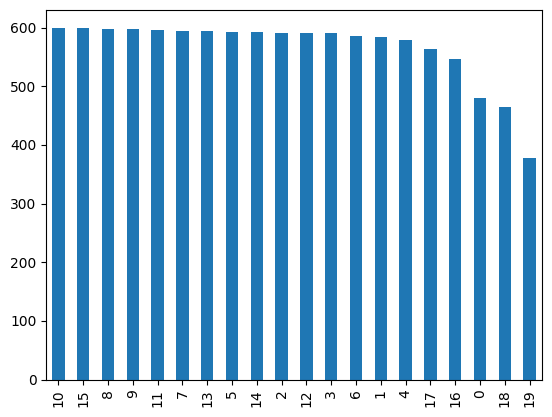

In [47]:
data['target'].value_counts().plot(kind='bar')

In [48]:
newsdata_test=fetch_20newsgroups(subset='test', shuffle=True)
train_email=data['email']
train_target=data['target']
test_email=newsdata_test['data']
test_target=newsdata_test['target']

In [49]:
vocab_size=10000
num_classes=20

In [50]:
#데이터 전처리
#tokenizer을 사용하면 빈도수 순서로 정렬한다.
def prepare_data(train_data, test_data, mode):
  tokenizer=Tokenizer(num_words=vocab_size)
  tokenizer.fit_on_texts(train_data) #문자 데이터를 받아서 리스트 형태로 변환
  X_train=tokenizer.texts_to_matrix(train_data, mode=mode) #해당 모드로 텍스트를 행렬로 바꿔준다.
  X_test=tokenizer.texts_to_matrix(test_data, mode=mode)
  return X_train, X_test, tokenizer.index_word

In [51]:
X_train, X_test, index_to_word=prepare_data(train_email, test_email, 'binary')
y_train=to_categorical(train_target, num_classes) #10진수를 2진수로 변경하여 원핫인코딩
y_test=to_categorical(test_target, num_classes)

In [54]:
print('train 본문의 크기 ',X_train.shape)
print('train 라벨의 크기 ',y_train.shape)
print('test 본문의 크기 ',X_test.shape)
print('test 라벨의 크기 ',y_test.shape)


train 본문의 크기  (11314, 10000)
train 라벨의 크기  (11314, 20)
test 본문의 크기  (7532, 10000)
test 라벨의 크기  (7532, 20)


In [56]:
print(index_to_word[1]) #0번 인덱스는 사용되지 않는다.
print(index_to_word[9999])

the
mic


In [57]:
#다층 퍼셉트론(MLP)로 텍스트 분류하기(모델설계)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [60]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
  model=Sequential()
  model.add(Dense(256, input_shape=(vocab_size,),activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
  score=model.evaluate(X_test, y_test, batch_size=128, verbose=0)
  return score[1]

In [65]:
modes=['binary', 'count', 'tfidf', 'freq']

for mode in modes:
  X_train, X_test, _=prepare_data(train_email, test_email, mode)
  score=fit_and_evaluate(X_train, y_train, X_test, y_test)
  print(mode+'의 테스트 정확도 : ', score)

Epoch 1/5
80/80 [==============================] - 6s 72ms/step - loss: 2.2938 - accuracy: 0.3421 - val_loss: 0.9607 - val_accuracy: 0.8286
Epoch 2/5
80/80 [==============================] - 4s 56ms/step - loss: 0.8617 - accuracy: 0.7647 - val_loss: 0.4588 - val_accuracy: 0.8922
Epoch 3/5
80/80 [==============================] - 4s 54ms/step - loss: 0.4216 - accuracy: 0.8851 - val_loss: 0.3474 - val_accuracy: 0.9011
Epoch 4/5
80/80 [==============================] - 6s 71ms/step - loss: 0.2524 - accuracy: 0.9359 - val_loss: 0.3142 - val_accuracy: 0.9072
Epoch 5/5
80/80 [==============================] - 4s 54ms/step - loss: 0.1657 - accuracy: 0.9591 - val_loss: 0.3056 - val_accuracy: 0.9072
binary의 테스트 정확도 :  0.8324482440948486
Epoch 1/5
80/80 [==============================] - 6s 68ms/step - loss: 2.7793 - accuracy: 0.2428 - val_loss: 1.5745 - val_accuracy: 0.7403
Epoch 2/5
80/80 [==============================] - 5s 59ms/step - loss: 1.4826 - accuracy: 0.6227 - val_loss: 0.7475 - val